In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores


In [2]:
df = pd.read_csv('Data/Credit Card Customer Data.csv', index_col=0).dropna().drop('Customer Key', axis=1)
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,100000,2,1,1,0
2,50000,3,0,10,9
3,50000,7,1,3,4
4,30000,5,1,1,4
5,100000,6,0,12,3
...,...,...,...,...,...
656,99000,10,1,10,0
657,84000,10,1,13,2
658,145000,8,1,9,1


In [3]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


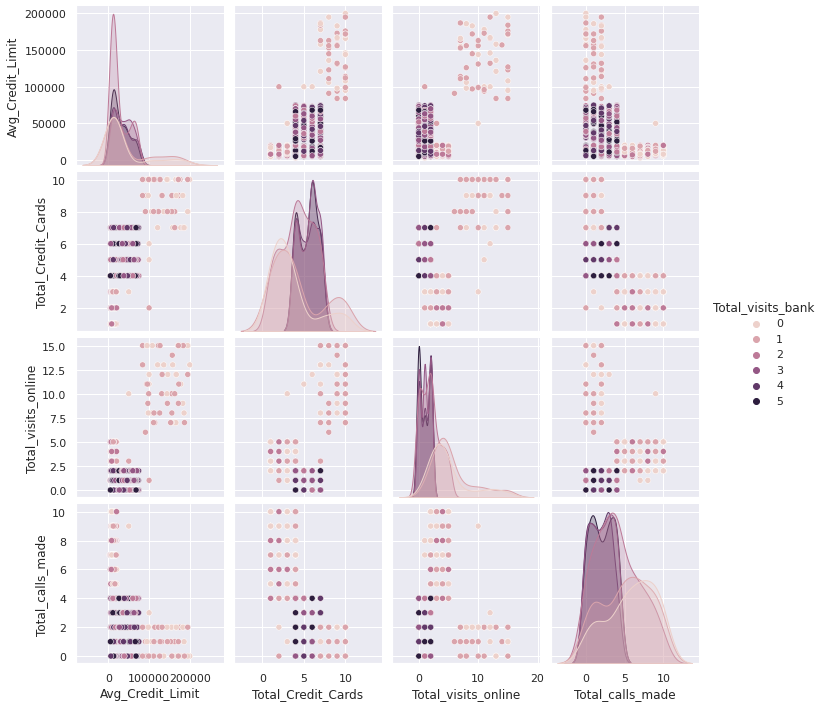

In [4]:
sns.pairplot(df, hue='Total_visits_bank')

In [5]:
coluna = df.columns
coluna

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

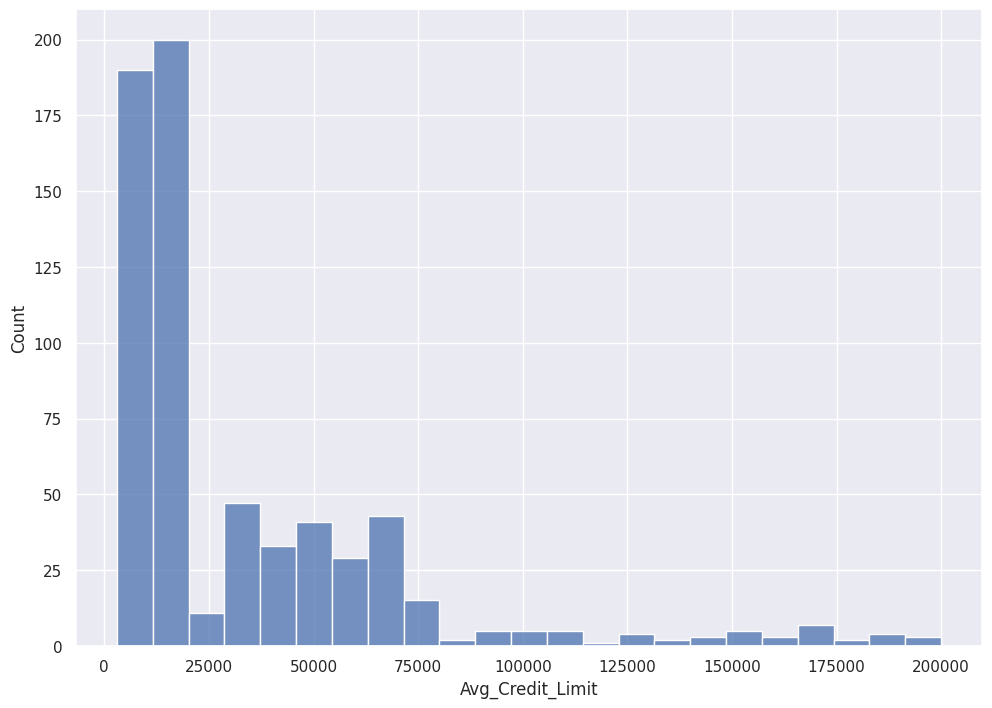

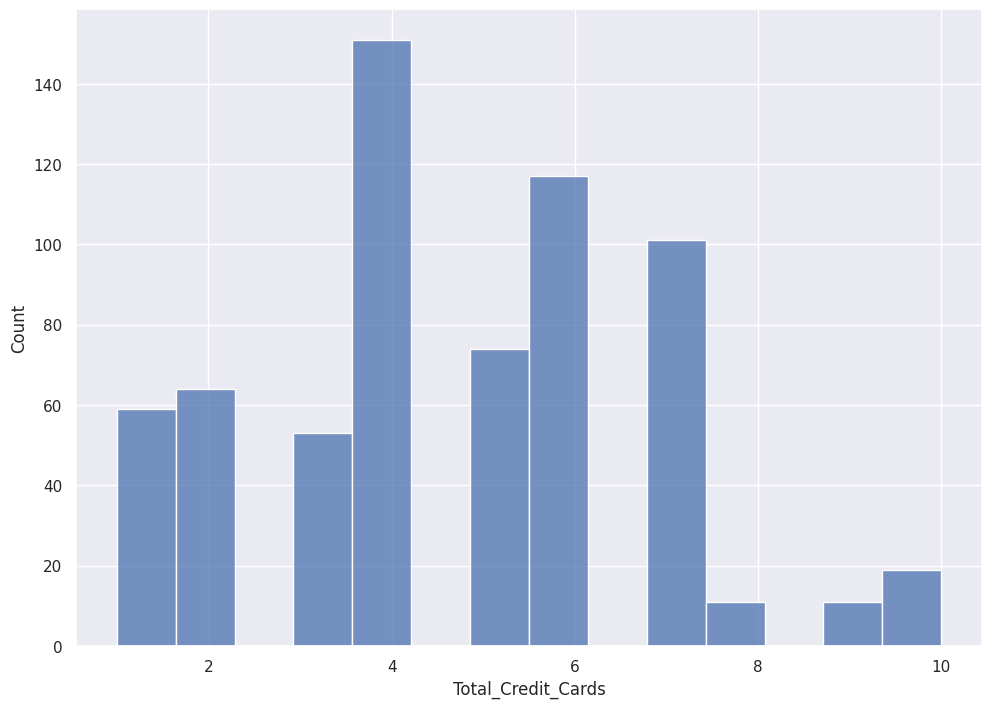

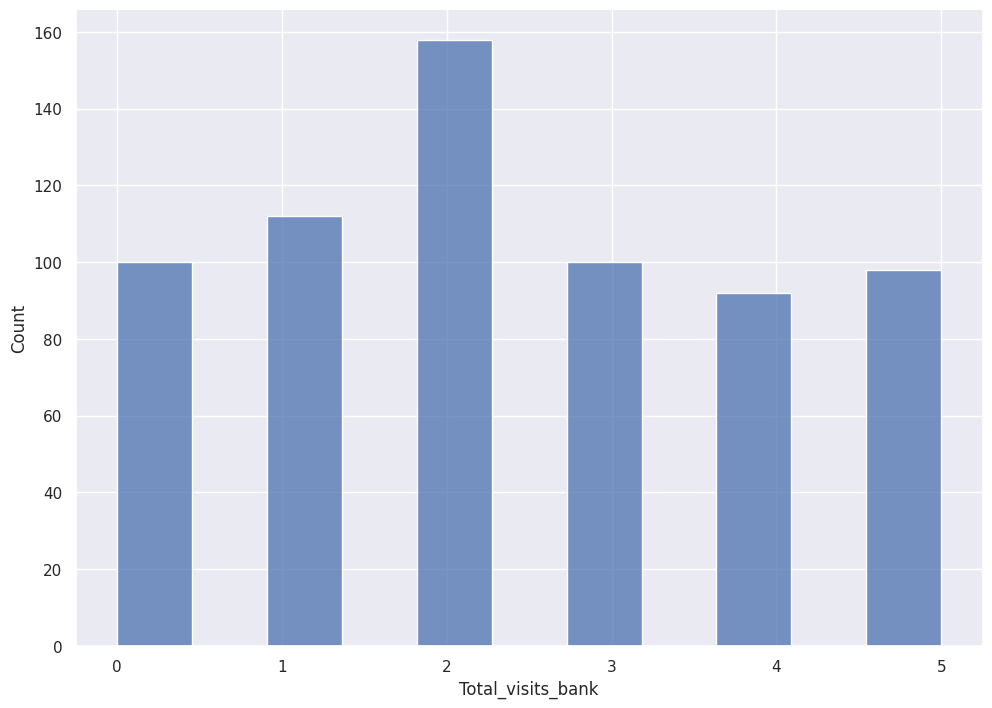

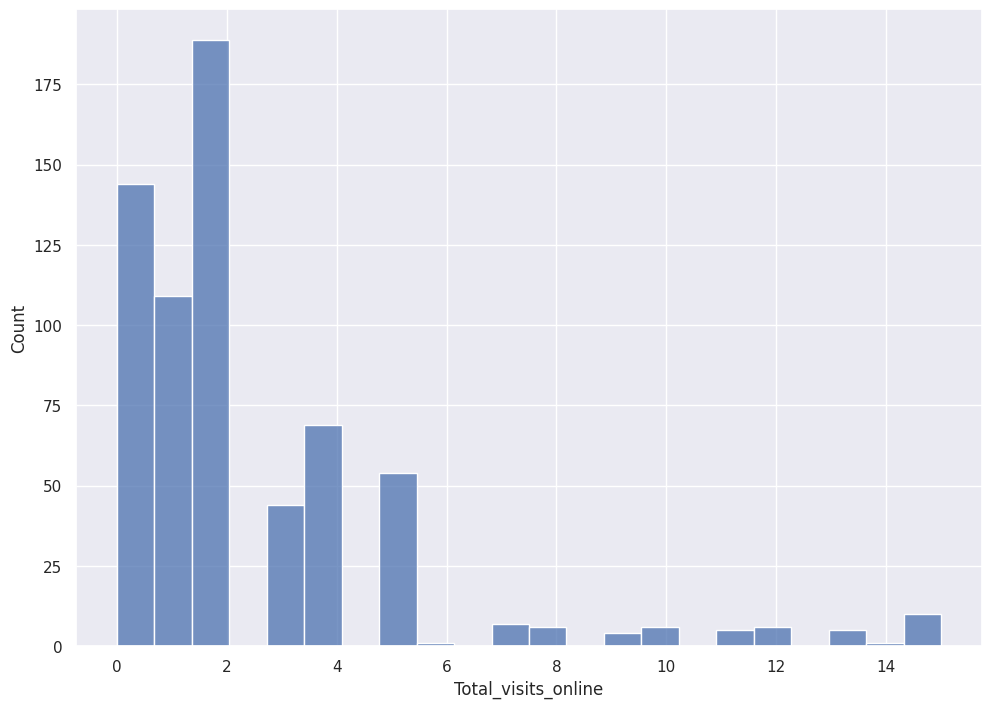

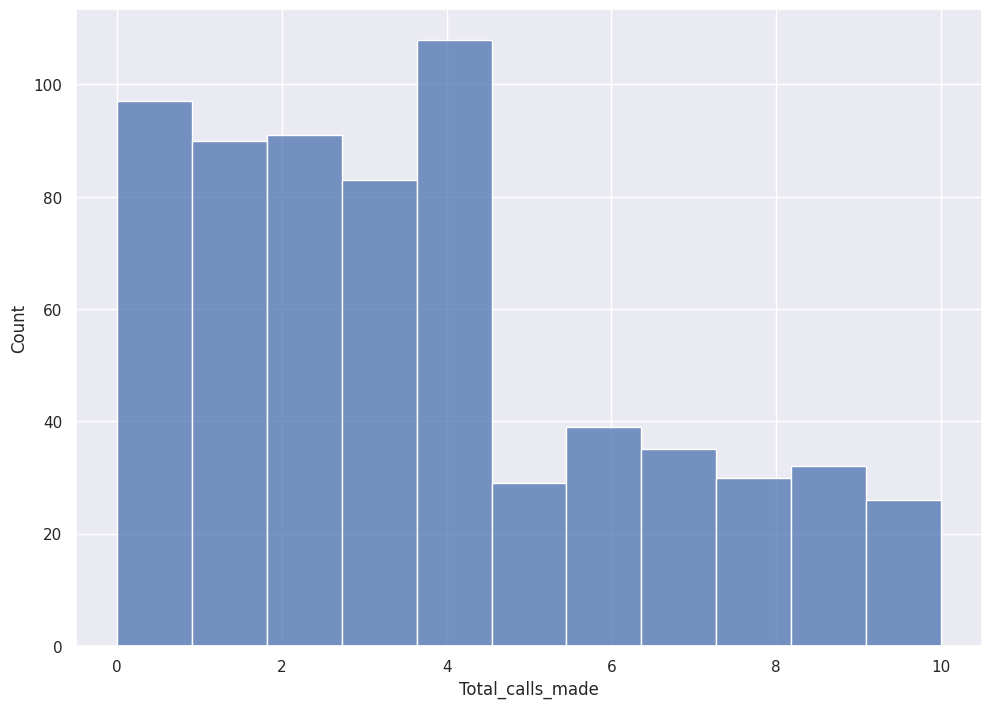

In [6]:
# AUtor Valdir Nascimento
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [8]:
df[coluna].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [14]:
df2 = df[df['Avg_Credit_Limit']>=187000]
df2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
631,200000,10,0,13,0
632,195000,8,0,15,0
633,187000,7,1,7,0
651,195000,10,1,12,2


In [13]:
df3 = df[df['Avg_Credit_Limit'] < 195000]
df3.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,657.000000,657.000000,657.000000,657.000000,657.000000
mean,33834.094368,4.684932,2.412481,2.557078,3.596651
std,36075.228738,2.149085,1.629201,2.849933,2.864339
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,187000.000000,10.000000,5.000000,15.000000,10.000000


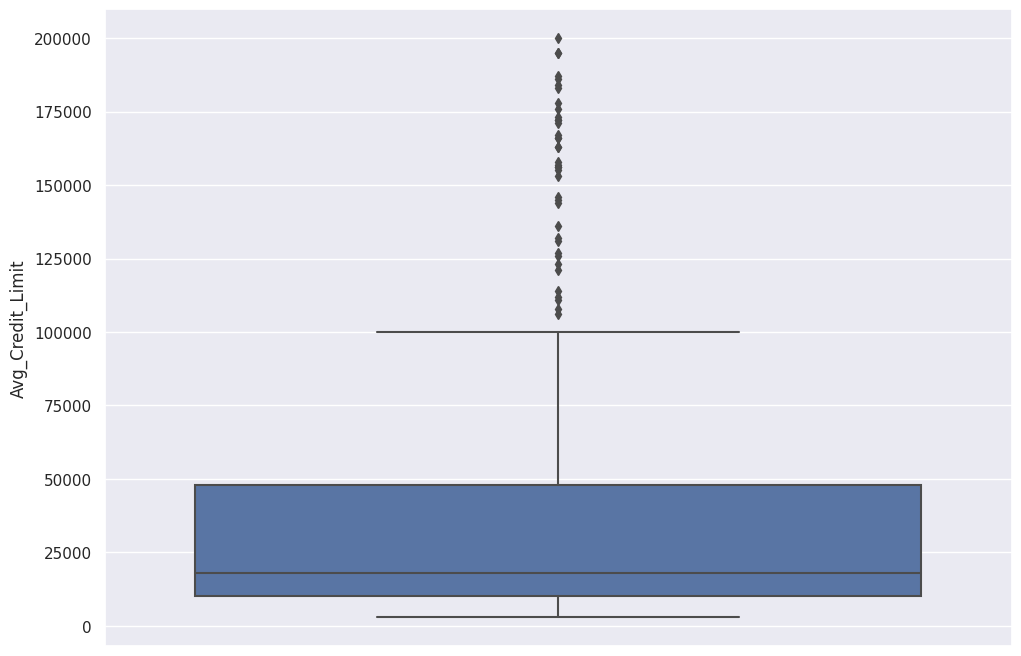

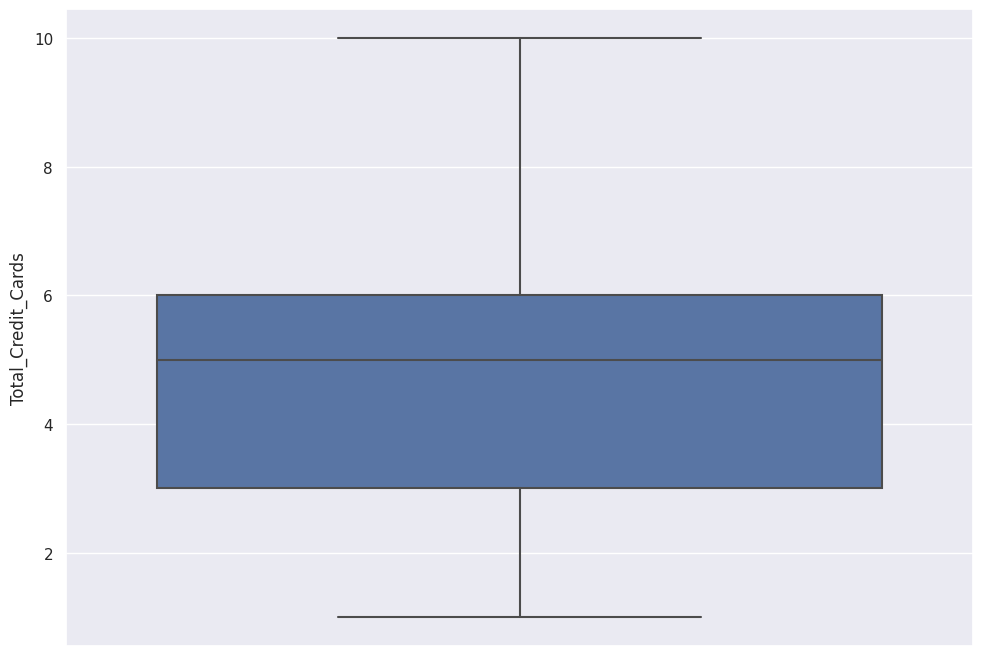

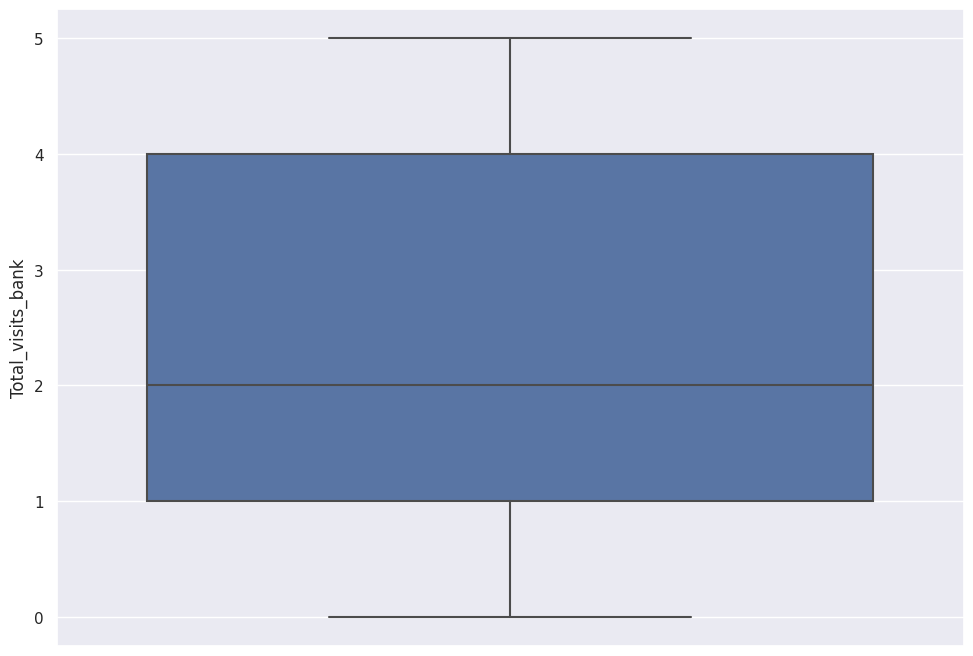

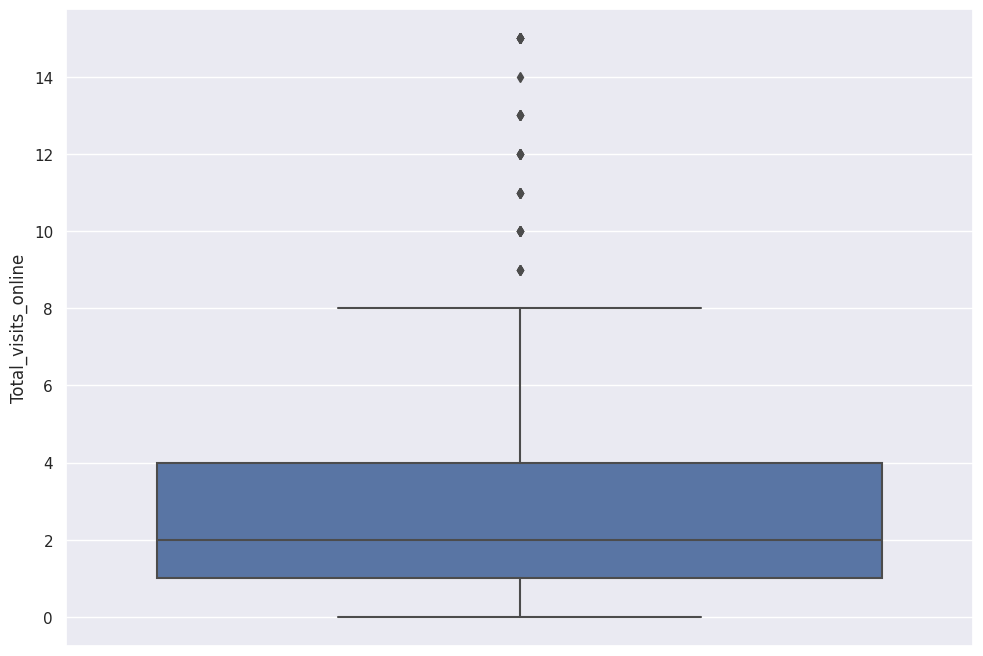

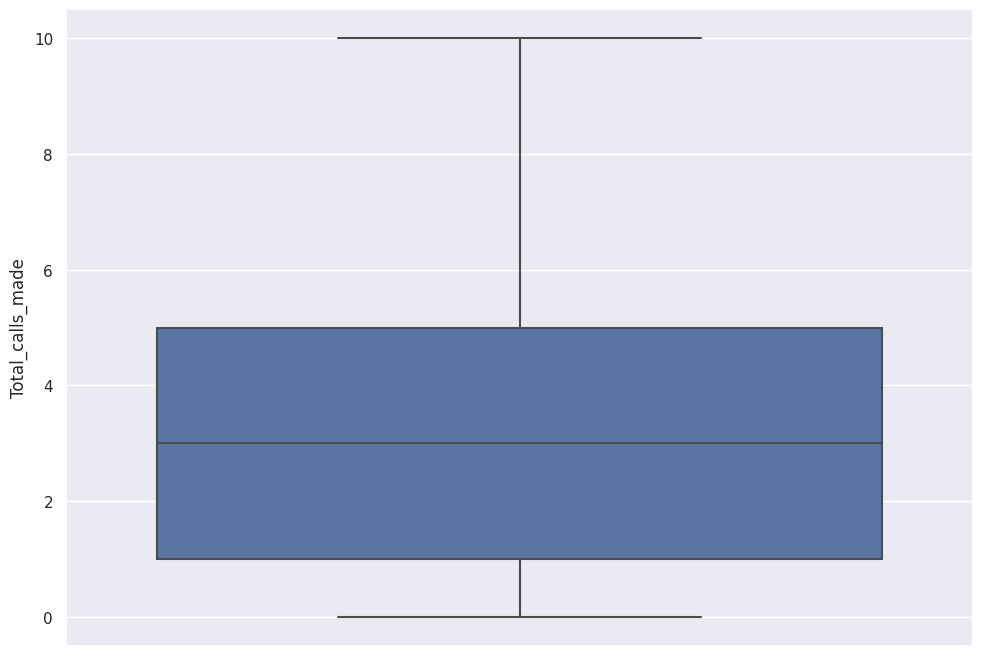

In [16]:
for col in coluna:
    sns.boxplot(y=col, data=df)
    plt.show()

In [31]:
# Normalizar com StanderScaler

ssc_data = StandardScaler()
scaler = ssc_data.fit_transform(df)
scaler


array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [22]:
# scaler.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.157323e-16,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


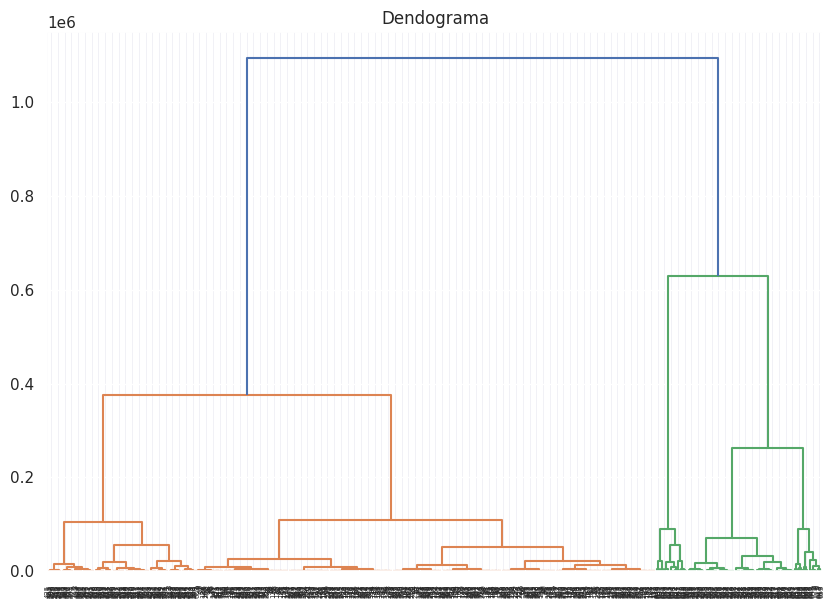

In [23]:
# Plotar um Dendograma para o modelo de clusterização hierárquica
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
# importar shc
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(df, method='ward'))





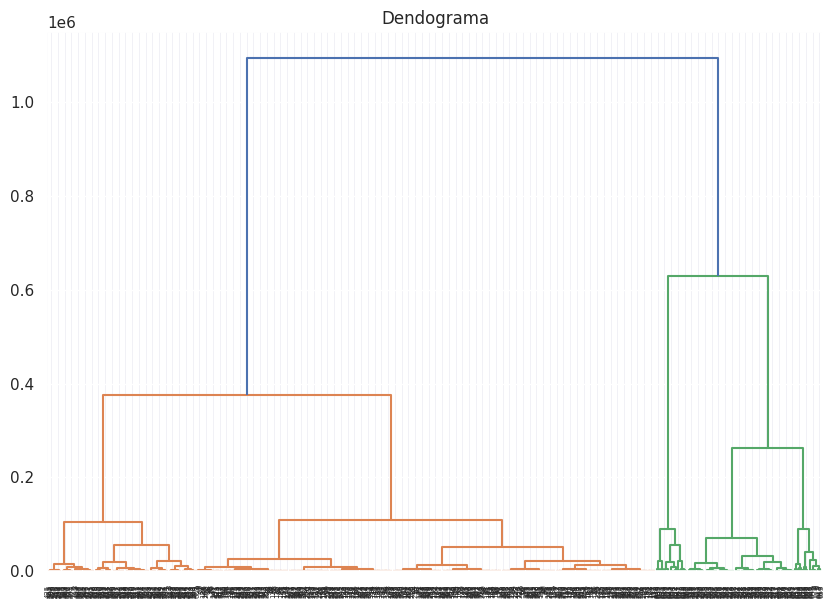

In [25]:
# Plotar dendograma com sklearne
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
import sklearn


plt.figure(figsize=(10, 7))
plt.title("Dendograma")

sklearn.cluster.AgglomerativeClustering.compute_full_tree = True
dend = dendrogram(linkage(df[coluna], method='ward'))


In [34]:
cluster = AgglomerativeClustering(n_clusters=3
                                  , affinity='euclidean'
                                  , linkage='ward')
label_hierarq = cluster.fit_predict(scaler)
df_hierarchy = df.copy()
df_hierarchy['cluster'] = label_hierarq.astype('str')

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

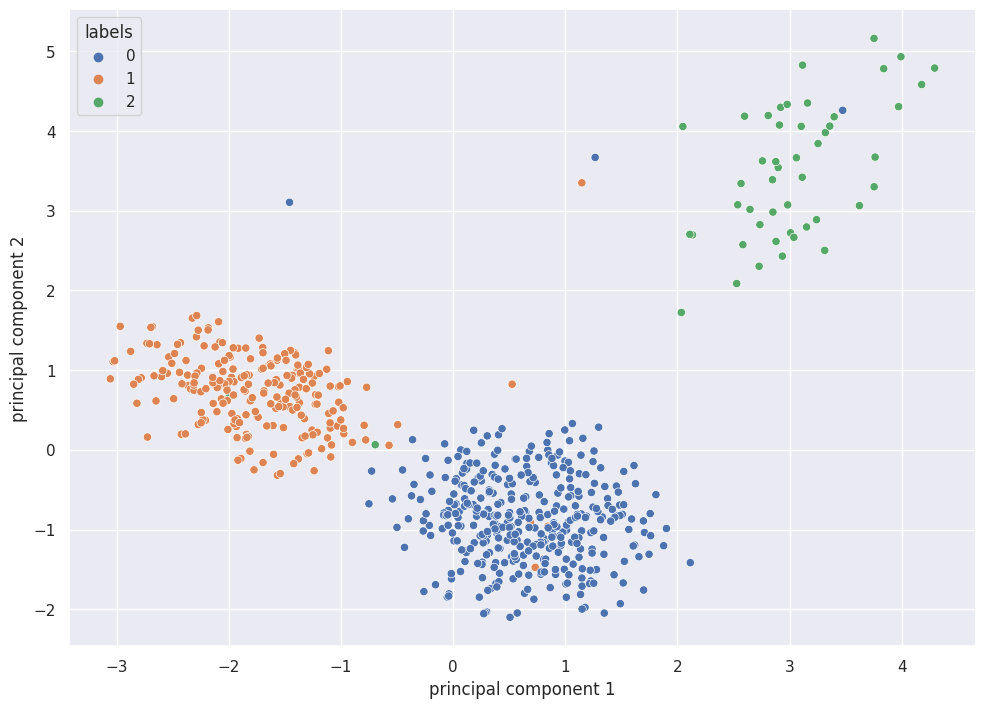

In [39]:
# usar PCA para reduzir a dimensionalidade dos dados e ver graficamente os clusters
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaler)

principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF['labels'] = df_hierarchy['cluster']
sns.scatterplot(data=principalDF, x="principal component 1", y="principal component 2", hue="labels", palette="deep")


